# H20 AutoML Melbourne Housing Regression 

Sanika Patne, Greeshma Tatinen, Nik Bear Brown

##**Abstract**


An abstract is:

What is the question?    
What did you do?   
What were the results?



The goal was to construct a realistic model to precisely predict the price of houses in Melbourne. It is generally believed that it’s impossible to precisely predict the price of house as it depends on various factors. For this dataset price is the dependent variable and others are independent variables. First, major factors affecting the housing prices should be selected. Then, a model for housing price prediction should be established from linear regression. That should be applied to the Melbourne housing dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

##**Dataset**

This is a  static snapshot of a dataset created by Tony Pino.
*(Format this so it is easy to read)*

It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.<br>


Notes on Specific Variables
Rooms: Number of rooms<br>
Price: Price in dollars<br>
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.<br>
Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.<br>
SellerG: Real Estate Agent<br>
Date: Date sold<br>
Distance: Distance from CBD<br>
Regionname: General Region (West, North West, North, North east …etc)<br>
Propertycount: Number of properties that exist in the suburb.<br>
Bedroom2 : Scraped # of Bedrooms (from different source)<br>
Bathroom: Number of Bathrooms<br>
Car: Number of carspots<br>
Landsize: Land Size<br>
BuildingArea: Building Size<br>
CouncilArea: Governing council for the area

##**Importing required Libraries and H20 Initialization** 

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.5 MB/s eta 0:00:00


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
min_mem_size=6 
run_time=222

In [6]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [8]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:30067..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm4fo0v5n
  JVM stdout: /tmp/tmpm4fo0v5n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpm4fo0v5n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:30067
Connecting to H2O server at http://127.0.0.1:30067 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    8 days
H2O_cluster_name:           H2O_from_python_unknownUser_wgrjt8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:30067
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

**Importing Data**

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [9]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/aiskunks/YouTube/main/CSV/Melbourne_Housing.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


##**Studying the Data**

In [10]:
df.describe()

Rows:6196
Cols:21

Suburb             Address             Rooms               Type                Price               Method              SellerG             Date                Distance            Postcode           Bedroom2            Bathroom            Car                 Landsize            BuildingArea        YearBuilt          CouncilArea         Lattitude          Longtitude         Regionname          Propertycount
-------  -----------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  -----------------  ------------------  ------------------  ------------------  ------------------  ------------------  -----------------  ------------------  -----------------  -----------------  ------------------  -----------------
type     int                int                 int                 int                 int                 int                 int                 int                 int                 int                int                 int                 int                 int                 int                 int                int                 int                int                int                 int
mins     0.0                0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                0.0                 0.0                 0.0                 0.0                 0.0                 0.0                0.0                 0.0                0.0                0.0                 0.0
mean     141.7333763718528  3058.9891865719806  1.931407359586829   0.5832795351839898  717.5915106520335   1.4372175597159458  97.45432537120723   25.937378954163982  71.29841833440932   71.09522272433827  2.902033570045191   0.5763395739186573  1.5735958683021307  361.07730794060683  191.0622982569399   81.70125887669462  14.678502259522269  1756.043092317624  1867.631536475145  3.8244028405422843  188.2254680438993
maxs     286.0              6116.0              7.0                 2.0                 1569.0              4.0                 202.0               50.0                191.0               184.0              9.0                 7.0                 10.0                1127.0              548.0               134.0              30.0                3462.0             3761.0             7.0                 283.0
sigma    83.20219111646345  1766.4944044852118  0.9710788063154112  0.8539919799572625  402.38630106987245  1.1429382882321082  57.472556631767944  14.404004145977009  38.656203305486514  46.96929056768282  0.9700548212641686  0.7113618878731119  0.929946606819003   285.75760340659457  107.81590440091563  34.35460062890252  9.217255605003533   896.9752262444393  979.3745168200843  1.9865142710876427  71.49054360008813
zeros    36                 1                   329                 4088                1                   757                 1                   114                 4                   31                 5                   3284                431                 1015                1                   1                  279                 1                  1                  571                 2
missing  0                  0                   0                   0                   0                   0                   0                   0                   0                   0                  0                   0                   0                   0                   0                   0                  0                   0                  0                  0                   0
0        0.0                2790.0              1.0                 0.0                 839.0               1.0                 18.0                41.0                12.0                50.0               2.0                 0.0                 0.0                 110.0               

Write about whether these numbers make sense ... plot long and lat on a map to check where these houses are. Where there really houses built there at the birth of Christ?

I believe price is wrong as the price seems dependent on the sale date.  This needs to be fixed.



In [11]:
df.types

{'Suburb': 'int',
 'Address': 'int',
 'Rooms': 'int',
 'Type': 'int',
 'Price': 'int',
 'Method': 'int',
 'SellerG': 'int',
 'Date': 'int',
 'Distance': 'int',
 'Postcode': 'int',
 'Bedroom2': 'int',
 'Bathroom': 'int',
 'Car': 'int',
 'Landsize': 'int',
 'BuildingArea': 'int',
 'YearBuilt': 'int',
 'CouncilArea': 'int',
 'Lattitude': 'int',
 'Longtitude': 'int',
 'Regionname': 'int',
 'Propertycount': 'int'}

In [12]:
df.shape

(6196, 21)

In [13]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [14]:
print(df_train.shape)
print(df_test.shape)

(4928, 21)
(1268, 21)


In [15]:
#Display all columns in X
X=df.columns
print(X)

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [16]:
#Seperate Dependent variable from Independent variable
y_numeric ='Price'
X.remove(y_numeric) 
print(X)

['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [23]:
dfpd=pd.read_csv("https://github.com/Sanikap05/DataScience/raw/main/sample.csv")

##**H20 AutoML Execution**

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [24]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [25]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_2_20230216_200440


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       14/28
# GBM base models (used / total)           7/11
# XGBoost base models (used / total)       7/12
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  0/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3931.639673651624
RMSE: 62.70278840411823
MAE: 46.47341533812701
RMSLE: NaN
Mean Residual Deviance: 3931.639673651624
R^2: 0.9755724060931305
Null degrees of freedom: 4927
Residual degrees of freedom: 4913
Null deviance: 793165318.9267448
Residual deviance: 19375120.311755203
AIC: 54805.186919007465

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 15089.8489967329
RMSE: 122.84074648394522
MAE: 90.11751296153348
RMSLE: NaN
Mean Residual Deviance: 15089.8489967329
R^2: 0.9062455529995662
Null degrees of freedom: 4927
Residual degrees of freedom: 4915
Null deviance: 793408888.1311321
Residual deviance: 74362775.85589974
AIC: 61429.17792437679

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     90.1243      1.48431      90.3732       87.7105       90.8554       91.6663       90.0161
mean_residual_deviance  15096.6      1014.29      14668         13864.5       15183.3       16647.5       15119.9
mse                     15096.6      1014.29      14668         13864.5       15183.3       16647.5       15119.9
null_deviance           1.58682e+08  8.52946e+06  1.62649e+08   1.65506e+08   1.56484e+08   1.64053e+08   1.44717e+08
r2                      0.906108     0.00603143   0.907671      0.915347      0.90506       0.899105      0.903356
residual_deviance       1.48726e+07  1.04721e+06  1.49907e+07   1.39893e+07   1.48493e+07   1.65476e+07   1.3986e+07
rmse                    122.814      4.10287      121.111       117.748       123.22        129.025       122.963
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Interpreting the above results**

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance. 

In [26]:
print(aml.leaderboard)

model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_2_20230216_200440     122.841  15089.8  90.1175      nan                   15089.8
StackedEnsemble_AllModels_2_AutoML_2_20230216_200440     123.711  15304.5  90.8576      nan                   15304.5
StackedEnsemble_AllModels_1_AutoML_2_20230216_200440     123.983  15371.7  90.9827      nan                   15371.7
StackedEnsemble_BestOfFamily_3_AutoML_2_20230216_200440  125.418  15729.6  92.6304      nan                   15729.6
StackedEnsemble_BestOfFamily_4_AutoML_2_20230216_200440  125.728  15807.5  92.68        nan                   15807.5
StackedEnsemble_BestOfFamily_2_AutoML_2_20230216_200440  125.736  15809.6  92.6161      nan                   15809.6
StackedEnsemble_BestOfFamily_1_AutoML_2_20230216_200440  127.047  16140.8  93.7927      nan                   16140.8
GBM_3_AutoML_2_20230216_200440                          

##**Analysing relation between all variables**

When all independent variables were plotted against 'price' variable it is observed that for'Landsize' and 'BuildingArea' roughly a linear line is obtained. So it can be concluded from this plot that variables Landsize and BuildingArea have linear relation with Price.

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['YearBuilt', 'Distance', 'Rooms', 'Longtitude', 'Bathroom','Suburb','Address','Type','SellerG','Method','Date','Postcode','Bedroom2','Car','Landsize','BuildingArea','CouncilArea','Lattitude','Regionname','Propertycount']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0       YearBuilt  10.475637
1        Distance   7.637472
2           Rooms  55.307917
3      Longtitude  11.004935
4        Bathroom   3.461328
5          Suburb   3.961901
6         Address   3.949918
7            Type   3.120556
8         SellerG   3.796406
9          Method   2.582672
10           Date   4.103909
11       Postcode   8.235019
12       Bedroom2  95.888657
13            Car   5.307108
14       Landsize   3.952572
15   BuildingArea  13.121787
16    CouncilArea   3.824382
17      Lattitude   8.020548
18     Regionname   6.569622
19  Propertycount   8.054029

VIF for 'YearBuilt','Rooms','Longtitude','Bedroom2' and 'BuildingArea' is greater than 10.'Rooms','Bedroom2' and 'BuildingArea' specify the same thing. More the rooms more will be the building area. Will drop the variables Bedroom2, Longtitude and YearBuilt. Not dropping Rooms and BuildingArea as for a customer number of rooms and the area are important aspects.

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [28]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('Price ~ Distance + Rooms + Bathroom +Suburb + Address + Type + SellerG + Method + Date + Postcode + Car + Landsize + BuildingArea + CouncilArea + Lattitude + Regionname + Propertycount', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1178.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:09:27   Log-Likelihood:                -41475.
No. Observations:                6196   AIC:                         8.299e+04
Df Residuals:                    6178   BIC:                         8.311e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       981.4529     21.295     46.088      0.000     939.707    1023.199
Distance         -5.0065      0.077    -65.138      0.000      -5.157      -4.856
Rooms            78.0944      4.528     17.246      0.000      69.217      86.971
Bathroom         26.1217      4.949      5.278      0.000      16.420      35.823
Suburb           -0.2988      0.030     -9.845      0.000      -0.358      -0.239
Address           0.0015      0.001      1.030      0.303      -0.001       0.004
Type           -175.7051      3.843    -45.721      0.000    -183.239    -168.171
SellerG          -0.2242      0.044     -5.153      0.000      -0.310      -0.139
Method          -10.6975      2.195     -4.872      0.000     -15.001      -6.394
Date             -0.2143      0.173     -1.240      0.215      -0.553       0.125
Postcode          1.4542      0.075     19.385      0.000       1.307       1.601
Car              14.4091      3.117      4.623      0.000       8.299      20.519
Landsize          0.0988      0.011      9.294      0.000       0.078       0.120
BuildingArea      1.1930      0.041     29.191      0.000       1.113       1.273
CouncilArea      -2.9391      0.286    -10.269      0.000      -3.500      -2.378
Lattitude        -0.0981      0.004    -23.823      0.000      -0.106      -0.090
Regionname      -13.0453      1.434     -9.097      0.000     -15.857     -10.234
Propertycount    -0.0749      0.036     -2.084      0.037      -0.145      -0.004
==============================================================================
Omnibus:                       47.645   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.601
Skew:                          -0.020   Prob(JB):                     1.04e-16
Kurtosis:                       3.533   Cond. No.                     3.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As seen from the OLS summary p-value for 'Address' and 'Date' is greater than 0.05. An extra variable 'Address' is unneccsary as 'Suburb','Postcode' and 'RegionName' will help us tell the location. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is 76.4%. Now will check VIF and p-values again for the selected independent variables.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['Distance', 'Rooms','Bathroom','Suburb','Type','SellerG','Method','Postcode','Car','Landsize','BuildingArea','CouncilArea','Lattitude','Regionname','Propertycount']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0        Distance   6.076498
1           Rooms  14.900616
2        Bathroom   3.244477
3          Suburb   3.907904
4            Type   2.290332
5         SellerG   3.731636
6          Method   2.548593
7        Postcode   5.152412
8             Car   5.222258
9        Landsize   3.865747
10   BuildingArea  12.725286
11    CouncilArea   3.663890
12      Lattitude   6.821993
13     Regionname   4.534706
14  Propertycount   7.585857

VIF for all except two variables are less than 10. Dropping either of the two variables 'Rooms' or 'BuildingArea' wont make sense as a customer should know the number of rooms and BuildingArea.

In [31]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('Price ~ Distance + Rooms + Bathroom +Suburb  + Type + SellerG + Method  + Postcode + Car + Landsize + BuildingArea + CouncilArea + Lattitude + Regionname + Propertycount', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1335.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:09:38   Log-Likelihood:                -41477.
No. Observations:                6196   AIC:                         8.299e+04
Df Residuals:                    6180   BIC:                         8.309e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       980.3199     20.163     48.620      0.000     940.793    1019.847
Distance         -5.0121      0.077    -65.426      0.000      -5.162      -4.862
Rooms            78.0876      4.528     17.244      0.000      69.210      86.965
Bathroom         26.3218      4.947      5.320      0.000      16.623      36.020
Suburb           -0.2978      0.030     -9.813      0.000      -0.357      -0.238
Type           -175.9604      3.831    -45.931      0.000    -183.470    -168.450
SellerG          -0.2252      0.044     -5.175      0.000      -0.311      -0.140
Method          -10.6203      2.195     -4.839      0.000     -14.923      -6.317
Postcode          1.4551      0.075     19.397      0.000       1.308       1.602
Car              14.4478      3.116      4.637      0.000       8.340      20.556
Landsize          0.0989      0.011      9.307      0.000       0.078       0.120
BuildingArea      1.1936      0.041     29.207      0.000       1.113       1.274
CouncilArea      -2.9426      0.286    -10.281      0.000      -3.504      -2.382
Lattitude        -0.0981      0.004    -23.839      0.000      -0.106      -0.090
Regionname      -13.0285      1.434     -9.085      0.000     -15.840     -10.217
Propertycount    -0.0745      0.036     -2.073      0.038      -0.145      -0.004
==============================================================================
Omnibus:                       47.381   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.020
Skew:                          -0.021   Prob(JB):                     1.39e-16
Kurtosis:                       3.530   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-values for all the variables are less than 0.05 and the accuracy is 76.4%. It is unaffected even after removing 'Address' and 'Date' tells us that these two variables were not important for calculating 'Price'.



In [32]:
#Dopping the unecessary features as discussed above
dfpd1=dfpd.drop(['Address','Date','Bedroom2','Longtitude','YearBuilt'], axis=1)

In [33]:
dfpd1

Suburb  Rooms  Type  Price  Method  SellerG  Distance  Postcode  \
0          0      1     0    839       1       18        12        50   
1          0      2     0   1118       3       18        12        50   
2          0      3     0   1174       4      112        12        50   
3          0      2     0   1291       1      112        12        50   
4          0      1     0   1193       1      112        12        50   
...      ...    ...   ...    ...     ...      ...       ...       ...   
6191     278      2     0    352       1      145       182       169   
6192     279      2     0    851       4      189        49         8   
6193     279      0     2    106       3      189        49         8   
6194     281      1     2    301       0      196        31       135   
6195     286      5     0   1422       4      179        44         6   

      Bathroom  Car  Landsize  BuildingArea  CouncilArea  Lattitude  \
0            0    0       110            85           29       1712   
1            1    0        88           224           29       1690   
2            0    2        74           212           29       1722   
3            1    0       198           313           29       1788   
4            0    2       209           143           29       1737   
...        ...  ...       ...           ...          ...        ...   
6191         1    1       874           223           27       3457   
6192         0    0       133           162           10        919   
6193         0    1         0            24           10       1041   
6194         0    1         0            56           25       1042   
6195         2    2       929           481           16       1677   

      Regionname  Propertycount  
0              2            135  
1              2            135  
2              2            135  
3              2            135  
4              2            135  
...          ...            ...  
6191           3             51  
6192           6            197  
6193           6            197  
6194           5            144  
6195           6            201  

[6196 rows x 16 columns]

The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

In [34]:
#Calculating correlation matrix for all variables
dfpd1.corr()

Suburb     Rooms      Type     Price    Method   SellerG  \
Suburb         1.000000 -0.067093  0.025932 -0.141575  0.044450  0.037319   
Rooms         -0.067093  1.000000 -0.584355  0.592389 -0.054857 -0.018201   
Type           0.025932 -0.584355  1.000000 -0.562952  0.089453  0.028784   
Price         -0.141575  0.592389 -0.562952  1.000000 -0.080628 -0.060926   
Method         0.044450 -0.054857  0.089453 -0.080628  1.000000 -0.011475   
SellerG        0.037319 -0.018201  0.028784 -0.060926 -0.011475  1.000000   
Distance      -0.057141  0.313438 -0.243443 -0.138974 -0.070698 -0.002401   
Postcode      -0.118094  0.022432  0.080003  0.219239 -0.056100 -0.019909   
Bathroom      -0.071368  0.613853 -0.279236  0.485593 -0.009392 -0.028212   
Car           -0.041784  0.422526 -0.279881  0.259399 -0.020787  0.011218   
Landsize      -0.048275  0.458500 -0.413588  0.321220 -0.047370 -0.029546   
BuildingArea  -0.077422  0.769215 -0.536966  0.657430 -0.058531 -0.040212   
CouncilArea    0.042183 -0.161131  0.095130 -0.117046  0.028821  0.001324   
Lattitude      0.119548  0.027173 -0.133498 -0.258689  0.010808 -0.033114   
Regionname     0.002561  0.008734  0.050107  0.054918  0.026923  0.016172   
Propertycount  0.043333 -0.091496  0.105963  0.001670 -0.026624  0.048350   

               Distance  Postcode  Bathroom       Car  Landsize  BuildingArea  \
Suburb        -0.057141 -0.118094 -0.071368 -0.041784 -0.048275     -0.077422   
Rooms          0.313438  0.022432  0.613853  0.422526  0.458500      0.769215   
Type          -0.243443  0.080003 -0.279236 -0.279881 -0.413588     -0.536966   
Price         -0.138974  0.219239  0.485593  0.259399  0.321220      0.657430   
Method        -0.070698 -0.056100 -0.009392 -0.020787 -0.047370     -0.058531   
SellerG       -0.002401 -0.019909 -0.028212  0.011218 -0.029546     -0.040212   
Distance       1.000000  0.219593  0.136958  0.301202  0.362223      0.248241   
Postcode       0.219593  1.000000  0.108407  0.020077  0.050818      0.071789   
Bathroom       0.136958  0.108407  1.000000  0.340808  0.247443      0.660611   
Car            0.301202  0.020077  0.340808  1.000000  0.378963      0.416365   
Landsize       0.362223  0.050818  0.247443  0.378963  1.000000      0.433817   
BuildingArea   0.248241  0.071789  0.660611  0.416365  0.433817      1.000000   
CouncilArea   -0.275744 -0.081567 -0.093624 -0.149610 -0.201646     -0.181029   
Lattitude     -0.015889 -0.622147 -0.079304  0.021403  0.044072     -0.028563   
Regionname    -0.065304  0.015812  0.048440  0.015210 -0.040962      0.043335   
Propertycount -0.150722  0.119359 -0.036331 -0.043686 -0.078819     -0.065245   

               CouncilArea  Lattitude  Regionname  Propertycount  
Suburb            0.042183   0.119548    0.002561       0.043333  
Rooms            -0.161131   0.027173    0.008734      -0.091496  
Type              0.095130  -0.133498    0.050107       0.105963  
Price            -0.117046  -0.258689    0.054918       0.001670  
Method            0.028821   0.010808    0.026923      -0.026624  
SellerG           0.001324  -0.033114    0.016172       0.048350  
Distance         -0.275744  -0.015889   -0.065304      -0.150722  
Postcode         -0.081567  -0.622147    0.015812       0.119359  
Bathroom         -0.093624  -0.079304    0.048440      -0.036331  
Car              -0.149610   0.021403    0.015210      -0.043686  
Landsize         -0.201646   0.044072   -0.040962      -0.078819  
BuildingArea     -0.181029  -0.028563    0.043335      -0.065245  
CouncilArea       1.000000   0.100716   -0.077807       0.055146  
Lattitude         0.100716   1.000000   -0.383896      -0.054587  
Regionname       -0.077807  -0.383896    1.000000      -0.056324  
Propertycount     0.055146  -0.054587   -0.056324       1.000000

Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

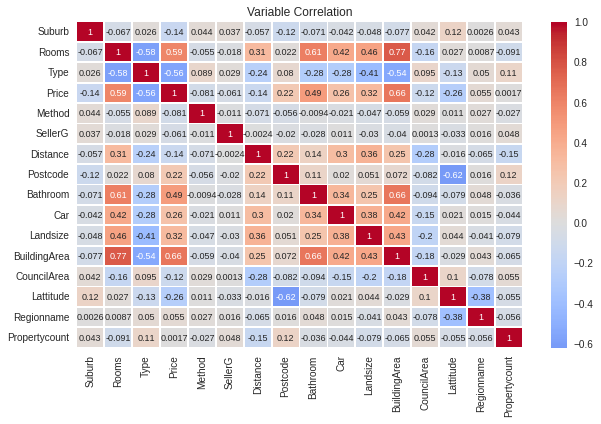

In [35]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

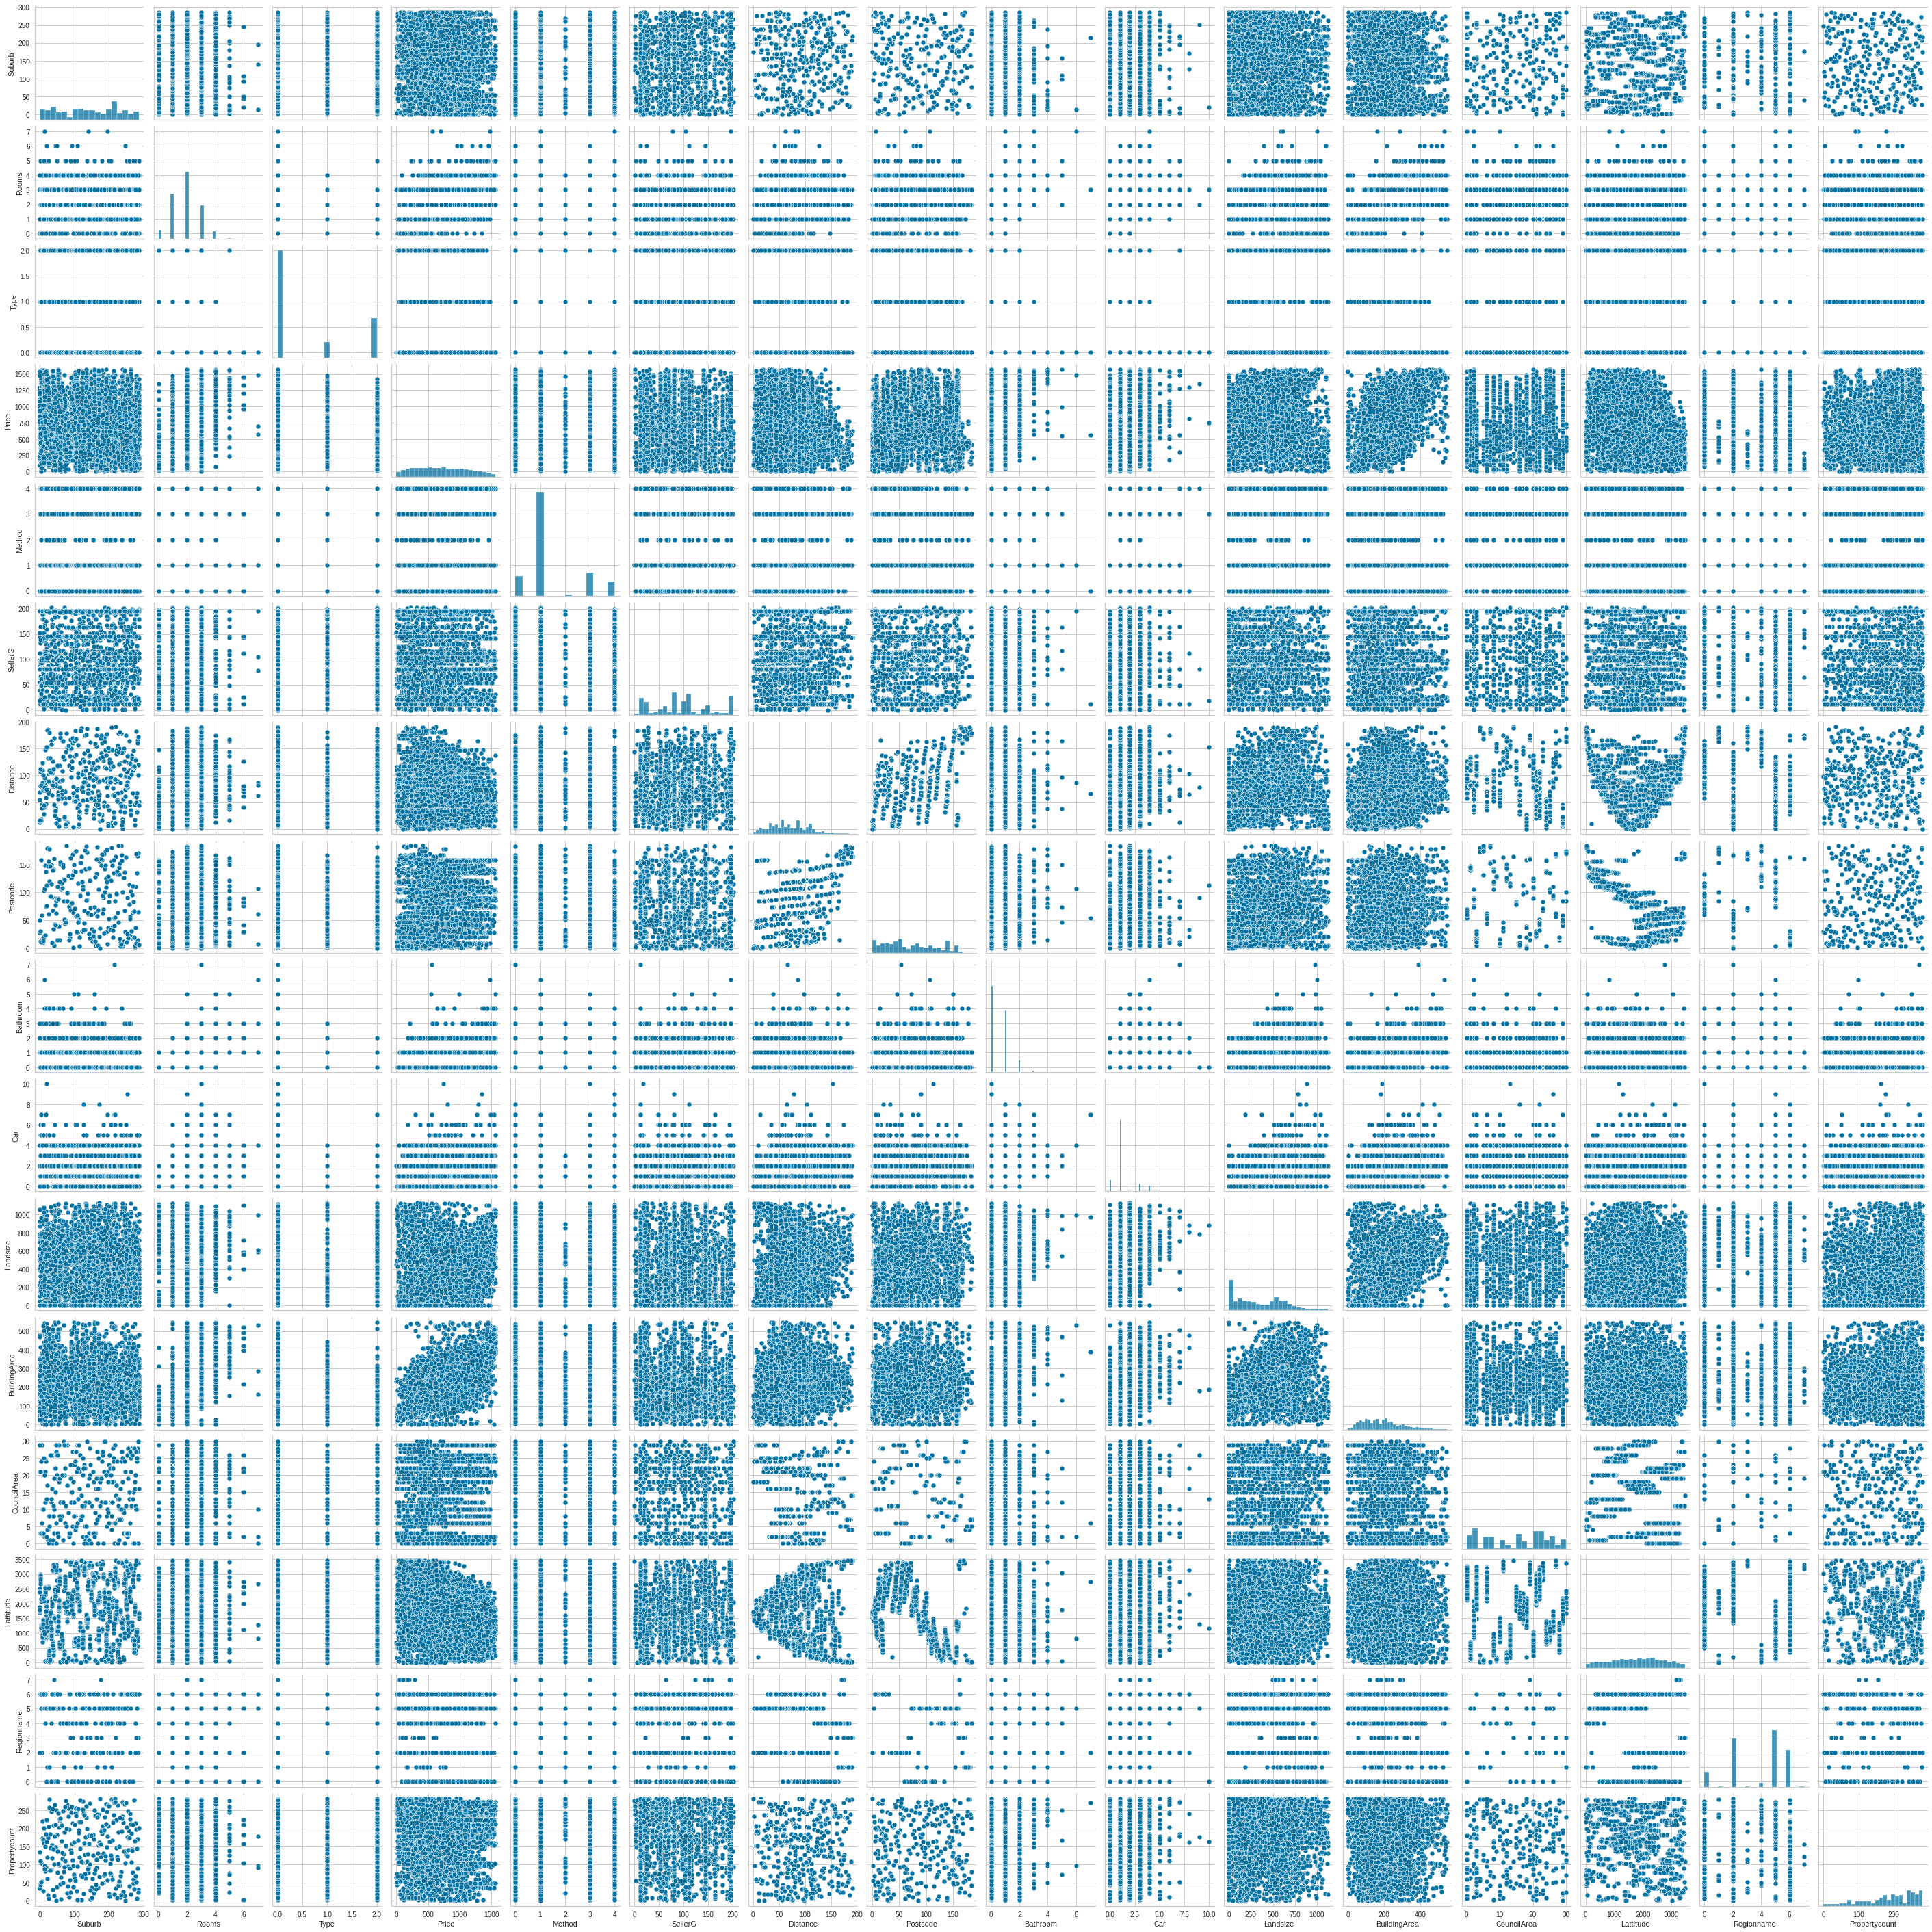

In [36]:
sns.pairplot(dfpd1)


When all independent variables were plotted against 'price' variable it is observed that for'Landsize' and 'BuildingArea' roughly a linear line is obtained. So it can be concluded from this plot that variables Landsize and BuildingArea have linear relation with Price

##**H20 AutoML Rexecution on new model**

Dropping the variables that are not significant for determining Price. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [37]:
df1=df.drop(['Date','Address','Bedroom2','Longtitude','YearBuilt'], axis=1)

In [38]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [39]:
X1=df1.columns
print(X1)

['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Regionname', 'Propertycount']


In [40]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Price'
X1.remove(y1_numeric) 
print(X1)

['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Regionname', 'Propertycount']


In [41]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [42]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_3_20230216_201204


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       12/34
# GBM base models (used / total)           6/12
# XGBoost base models (used / total)       6/16
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  0/3
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4987.50422868015
RMSE: 70.62226439785225
MAE: 52.81223893261901
RMSLE: NaN
Mean Residual Deviance: 4987.50422868015
R^2: 0.969338453034641
Null degrees of freedom: 4920
Residual degrees of freedom: 4908
Null deviance: 800465427.8228006
Residual deviance: 24543508.309335016
AIC: 55893.98700725231

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 16006.578912394754
RMSE: 126.51710916866048
MAE: 94.44241140828039
RMSLE: NaN
Mean Residual Deviance: 16006.578912394754
R^2: 0.9015967809601246
Null degrees of freedom: 4920
Residual degrees of freedom: 4908
Null deviance: 800694302.5828041
Residual deviance: 78768374.82789458
AIC: 61632.188884672505

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     94.4442      3.49718      92.1561       94.2435       91.0814       100.128       94.6117
mean_residual_deviance  16001.5      1124.24      15505.2       16116.2       14760.3       17797.5       15828.1
mse                     16001.5      1124.24      15505.2       16116.2       14760.3       17797.5       15828.1
null_deviance           1.60139e+08  4.99816e+06  1.58974e+08   1.68446e+08   1.57585e+08   1.60346e+08   1.55344e+08
r2                      0.901575     0.00747756   0.900321      0.903542      0.908676      0.889383      0.905952
residual_deviance       1.57537e+07  1.34224e+06  1.58463e+07   1.62129e+07   1.43913e+07   1.77085e+07   1.46093e+07
rmse                    126.436      4.39797      124.52        126.95        121.492       133.407       125.81
rmsle                   0.394992     0            nan           nan           nan           0.394992      nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [43]:
print(aml1.leaderboard)

model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_3_20230216_201204     126.517  16006.6  94.4424      nan                   16006.6
StackedEnsemble_AllModels_2_AutoML_3_20230216_201204     126.945  16115    94.8103      nan                   16115
StackedEnsemble_AllModels_1_AutoML_3_20230216_201204     127.248  16192.1  94.9797      nan                   16192.1
StackedEnsemble_BestOfFamily_3_AutoML_3_20230216_201204  128.382  16482    96.1504      nan                   16482
StackedEnsemble_BestOfFamily_2_AutoML_3_20230216_201204  128.504  16513.2  96.2058      nan                   16513.2
GBM_3_AutoML_3_20230216_201204                           129.918  16878.8  97.5154      nan                   16878.8
GBM_4_AutoML_3_20230216_201204                           129.933  16882.5  97.0631      nan                   16882.5
StackedEnsemble_BestOfFamily_1_AutoML_3_20230216_201204  130

In [44]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_AllModels_3_AutoML_3_20230216_201204': 0,
 'StackedEnsemble_AllModels_2_AutoML_3_20230216_201204': 1,
 'StackedEnsemble_AllModels_1_AutoML_3_20230216_201204': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_3_20230216_201204': 3,
 'StackedEnsemble_BestOfFamily_2_AutoML_3_20230216_201204': 4,
 'GBM_3_AutoML_3_20230216_201204': 5,
 'GLM_1_AutoML_3_20230216_201204': 37}

In [45]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

5


In [46]:
best_model1.algo

'gbm'

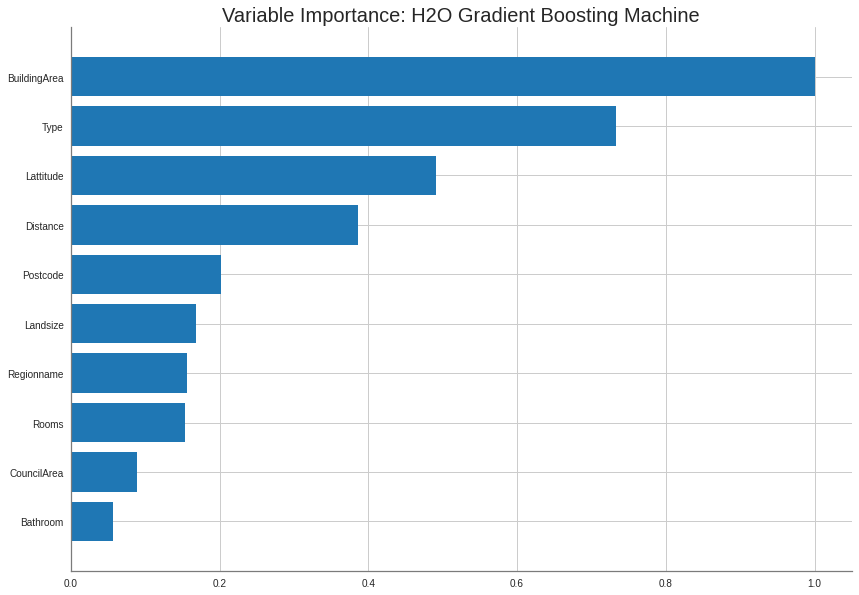

<Figure size 576x396 with 0 Axes>

In [47]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

37
glm


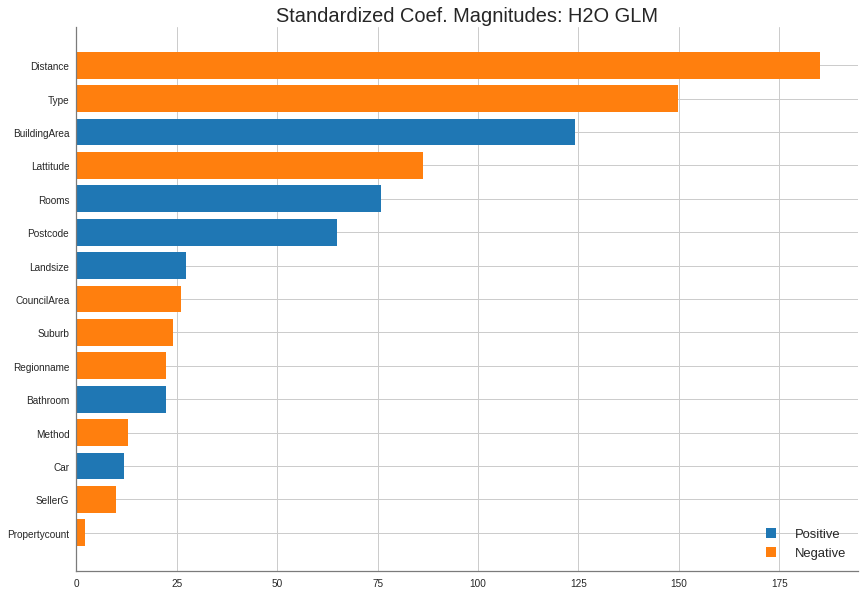

In [48]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo) 
  glm_model1.std_coef_plot()

From the above results, we observe that BuildinArea, Type, Distance, Latitire, Rooms, Postcode are some of the important features.

##**Checking if assumptions violated**

*   列表项
*   列表项



Checking if the model has violated any assumptions. For linear regression some of the assumptions are: 

(1)There needs to be linear relation between the independent and dependent variable. 

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed. 

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. 

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [50]:
#Seperating the predictor and target variables
A=dfpd1.drop(['Price'],axis=1)
B=dfpd1['Price']

In [51]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

Here we are check if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.

In [52]:
cols1 = ['Suburb','Rooms','Type','Method','SellerG','Distance','Postcode','Bathroom','Car','Landsize','BuildingArea','CouncilArea','Lattitude','Regionname','Propertycount']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [53]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [54]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.633273374854532e-13


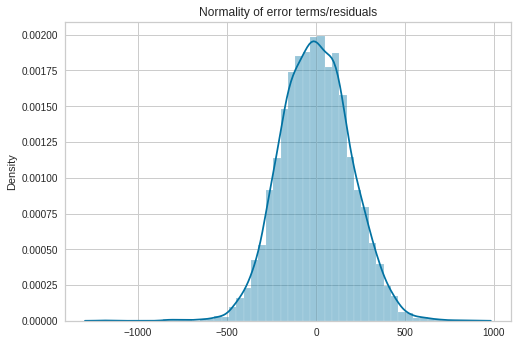

In [55]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

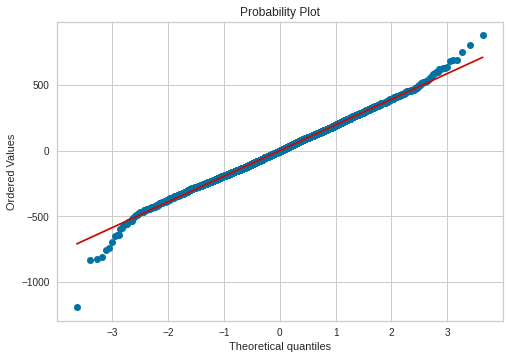

In [56]:
import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

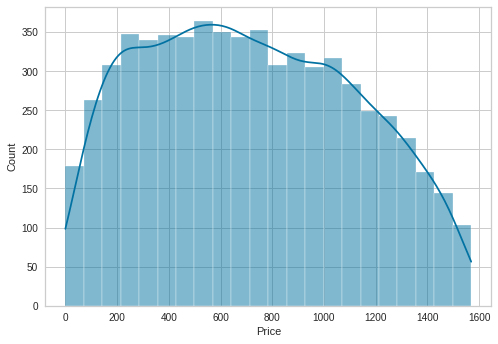

In [57]:
sns.histplot(dfpd.Price, kde = True)

Ideally for the scatterplot the result should be scattered and it should not have any particular pattern.When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions are satisfied.



##**Ridge Regularization in H20**

1.   列表项
2.   列表项




The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected.
For this model, Ridge Regularization is used.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a
    description of the error distribution.

In [58]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [59]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676577312852_69


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  15                            15                             1                       py_12_sid_add2

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 37972.72000878491
RMSE: 194.86590263251526
MAE: 155.74884375701694
RMSLE: NaN
Mean Residual Deviance: 37972.72000878491
R^2: 0.7665561201418972
Null degrees of freedom: 4920
Residual degrees of freedom: 4905
Null deviance: 800465427.8228006
Residual deviance: 186863755.16323057
AIC: 65889.28423614136

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2023-02-16 20:16:13  0.000 sec   0             800465427.8228006          162663.16354862845
    2023-02-16 20:16:13  0.028 sec   1                                                            194.86590263251526  37972.72000878491    155.74884375701694  0.7665561201418972

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Distance       193.086                1                    0.222359
Type           154.141                0.798304             0.17751
BuildingArea   128.092                0.663395             0.147512
Lattitude      88.5269                0.458485             0.101948
Rooms          75.9398                0.393296             0.087453
Postcode       67.3317                0.348714             0.0775398
CouncilArea    27.5359                0.142609             0.0317105
Landsize       27.34                  0.141595             0.031485
Suburb         24.3731                0.126229             0.0280683
Regionname     24.2825                0.12576              0.027964
Bathroom       19.3664                0.100299             0.0223025
Method         12.8033                0.0663087            0.0147444
Car            12.4342                0.0643975            0.0143194
SellerG        9.88778                0.0512093            0.0113869
Propertycount  3.20931                0.0166212            0.00369587

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [60]:
#Model details without regularization
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676577312852_70


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              15                            15                             1                       py_12_sid_add2

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 37972.593001058194
RMSE: 194.86557674730085
MAE: 155.73619687325234
RMSLE: NaN
Mean Residual Deviance: 37972.593001058194
R^2: 0.7665569009439175
Null degrees of freedom: 4920
Residual degrees of freedom: 4905
Null deviance: 800465427.8228006
Residual deviance: 186863130.1582074
AIC: 65889.26777679718

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2023-02-16 20:16:14  0.000 sec   0             800465427.8228006          162663.16354862845
    2023-02-16 20:16:14  0.068 sec   1                                                            194.86557674730085  37972.593001058194   155.73619687325234  0.7665569009439175

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Distance       193.409                1                    0.222487
Type           154.32                 0.797896             0.177522
BuildingArea   128.258                0.663144             0.147541
Lattitude      88.6108                0.458153             0.101933
Rooms          75.9347                0.392613             0.0873514
Postcode       67.4325                0.348653             0.0775709
CouncilArea    27.6013                0.14271              0.0317511
Landsize       27.3379                0.141348             0.0314481
Suburb         24.3819                0.126064             0.0280477
Regionname     24.3623                0.125963             0.0280252
Bathroom       19.2441                0.0994995            0.0221374
Method         12.8028                0.0661957            0.0147277
Car            12.4642                0.0644448            0.0143381
SellerG        9.88841                0.051127             0.0113751
Propertycount  3.25444                0.0168267            0.00374374

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

From the above results, the accuracy and other related variables were same for both the cases.
When dataset was regularized and when dataset was not regularized. This tells that for this specific model regularization does not help.

##**Data Report**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse      mse       mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -------  -------  --------  ----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_3_AutoML_3_20230216_201204     128.916  16619.4   93.8927  nan                          16619.4                1572                   0.229058  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_3_20230216_201204     129.717  16826.4   94.0639  nan                          16826.4                 697                   0.135326  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_3_20230216_201204     130.067  16917.4   94.5614  nan                          16917.4                 771                   0.105322  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_3_20230216_201204  130.68   17077.2   94.6091  nan                          17077.2                 409                   0.106776  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_3_20230216_201204  131.75   17358     95.8081  nan                          17358                   503                   0.075398  StackedEnsemble
GBM_2_AutoML_3_20230216_201204                           131.856  17385.9   97.1171    0.348767                   17385.9                1534                   0.020179  GBM
GBM_3_AutoML_3_20230216_201204                           132.088  17447.2   96.473   nan                          17447.2                 969                   0.019258  GBM
GBM_5_AutoML_3_20230216_201204                           132.406  17531.3   97.3079  nan                          17531.3                 951                   0.032322  GBM
GBM_4_AutoML_3_20230216_201204                           132.46   17545.8   97.6653  nan                          17545.8                1937                   0.022051  GBM
GBM_grid_1_AutoML_3_20230216_201204_model_4              132.668  17600.8   99.3122  nan                          17600.8                1276                   0.070575  GBM
GBM_grid_1_AutoML_3_20230216_201204_model_3              133.169  17733.9   97.7113  nan                          17733.9                 661                   0.027929  GBM
GBM_grid_1_AutoML_3_20230216_201204_model_5              134.397  18062.4   98.301     0.3551                     18062.4                1646                   0.024737  GBM
StackedEnsemble_BestOfFamily_1_AutoML_3_20230216_201204  134.513  18093.8   98.3068  nan                          18093.8                 232                   0.047875  StackedEnsemble
GBM_1_AutoML_3_20230216_201204                           135.545  18372.4   99.7912  nan                          18372.4                2205                   0.034593  GBM
GBM_grid_1_AutoML_3_20230216_201204_model_1              136.085  18519    101.752   nan                          18519                  1231                   0.039539  GBM
GBM_grid_1_AutoML_3_20230216_201204_model_2              136.444  18617.1  101.189   nan                          18617.1                 877                   0.04261   GBM
XGBoost_3_AutoML_3_20230216_201204                       139.292  19402.4  102.157   nan                          19402.4                 462                   0.006797  XGBoost
XGBoost_grid_1_AutoML_3_20230216_201204_model_9          139.478  19454.1  101.449   nan                          19454.1                 698                   0.0106    XGBoost
DRF_1_AutoML_3_20230216_201204                           139.731  19524.8  104.434     0.375207                   19524.8                2635                   0.031841  DRF
XGBoost_grid_1_AutoML_3_20230216_201204_model_3          139.834  19553.7  102.263   nan                          19553.7                2663                   0.003568  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

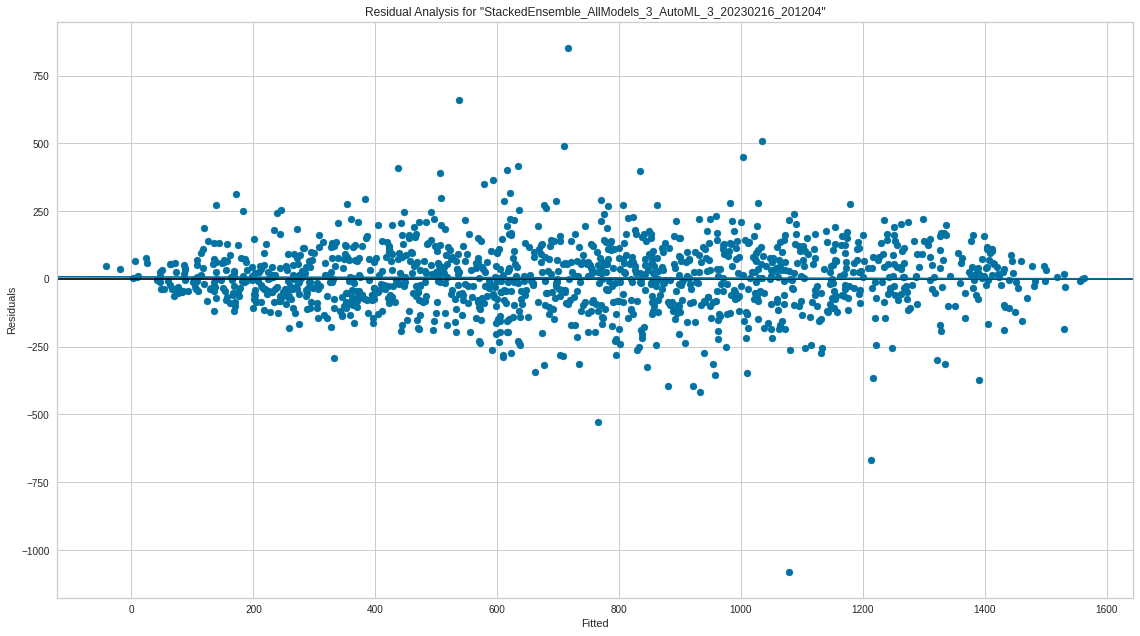

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

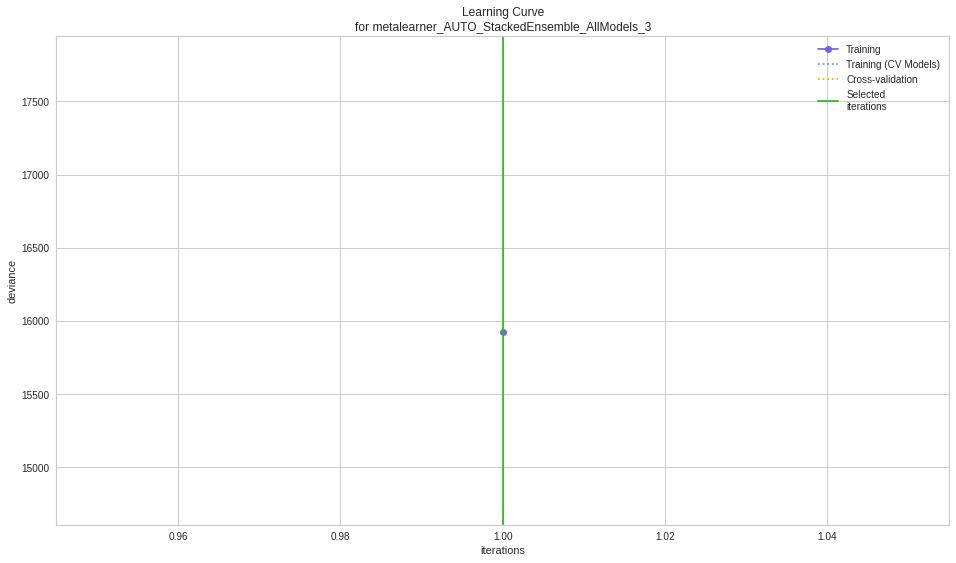

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

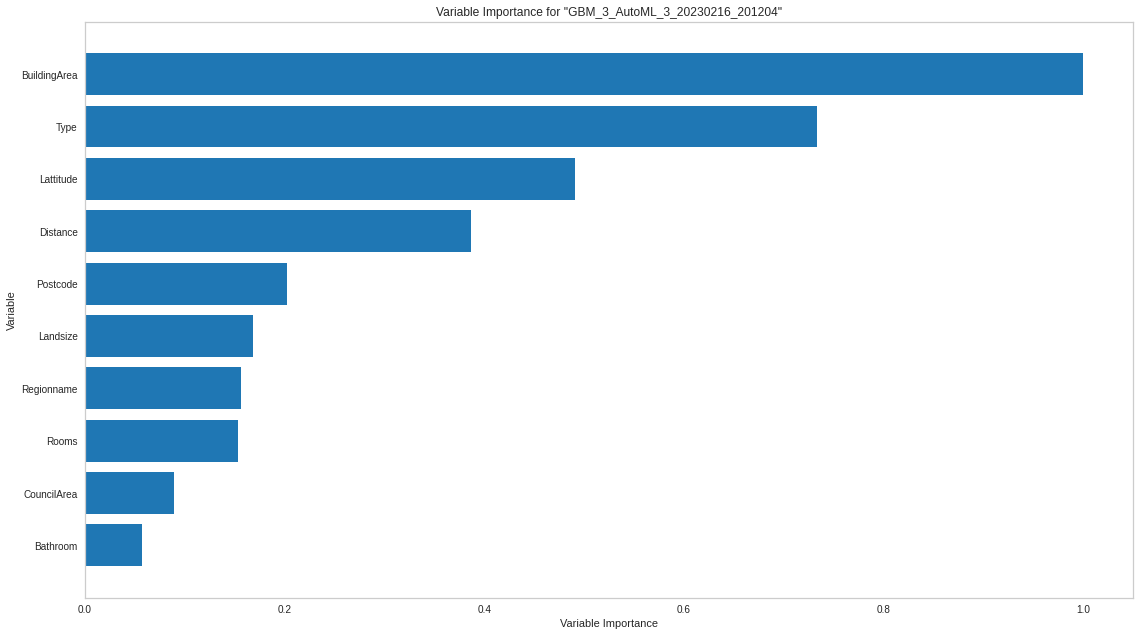

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

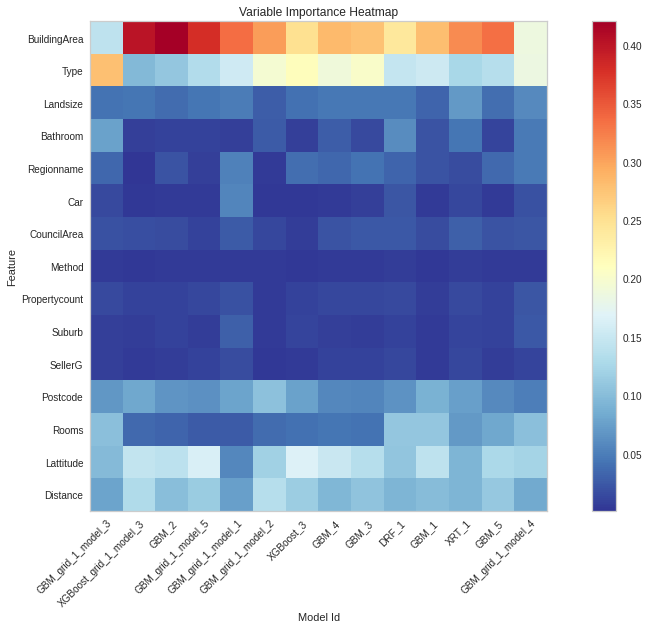

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

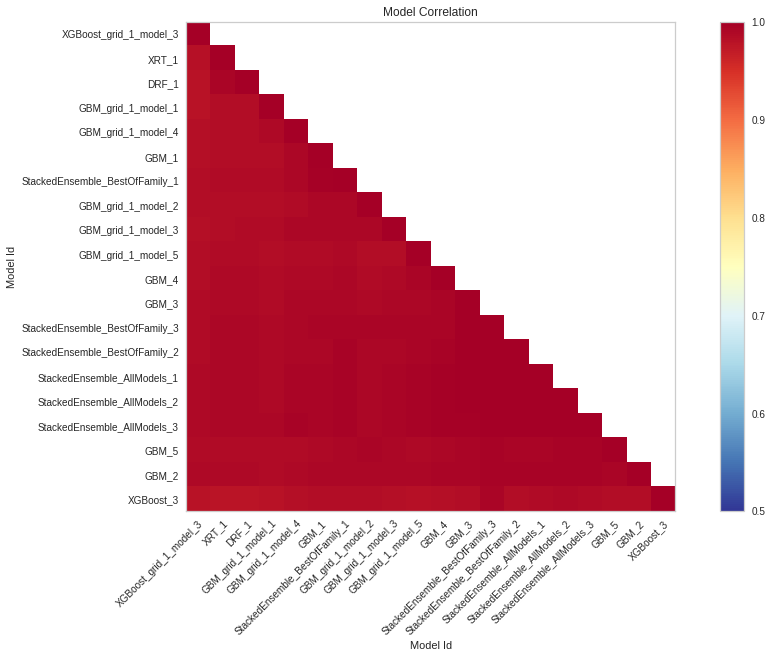

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

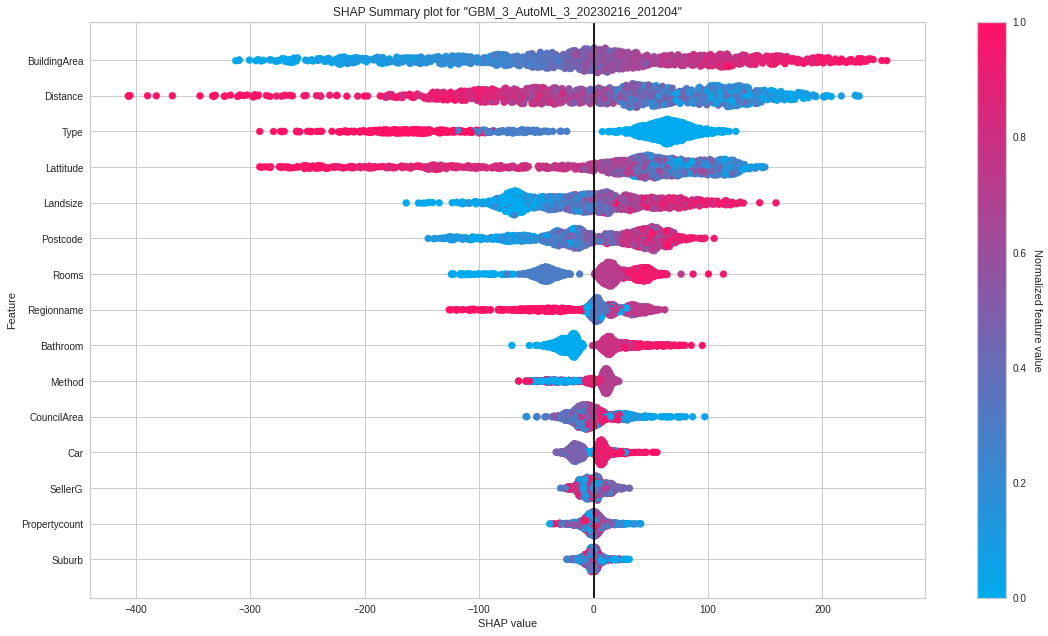

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

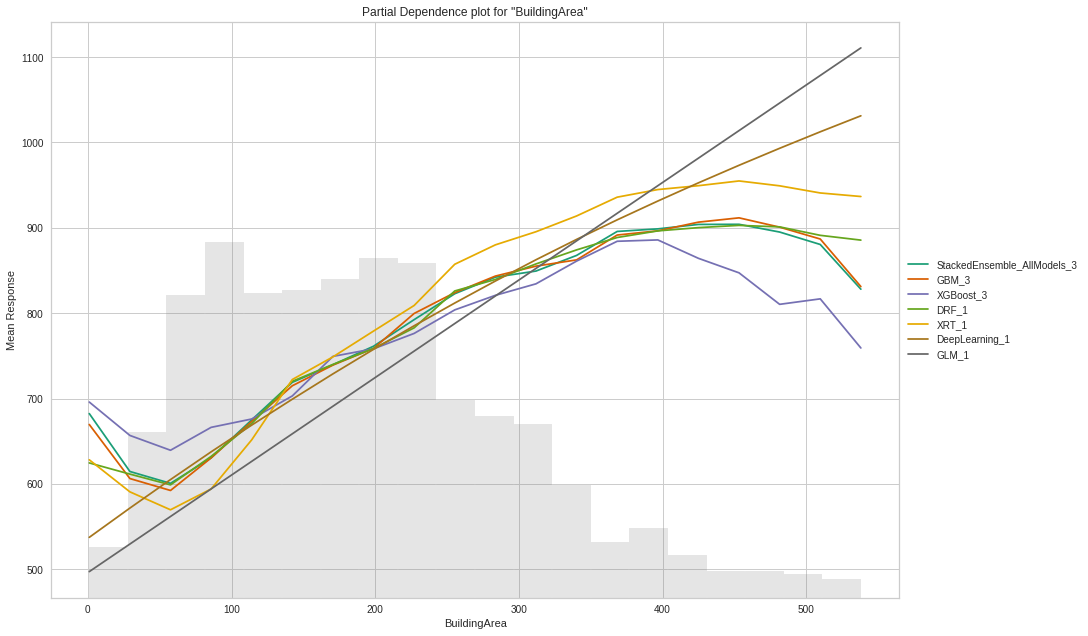

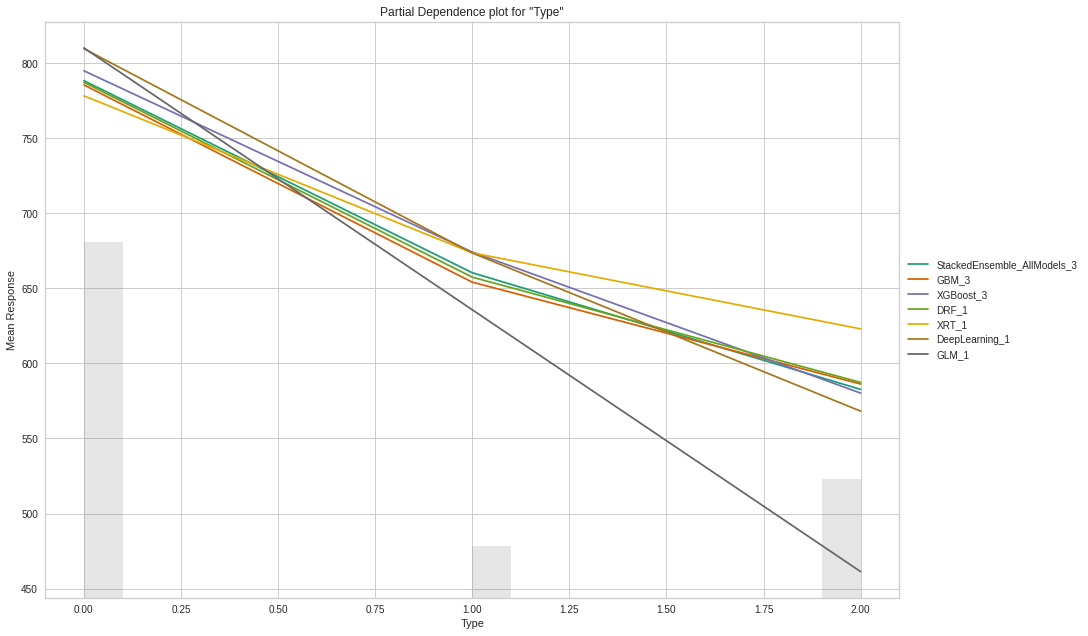

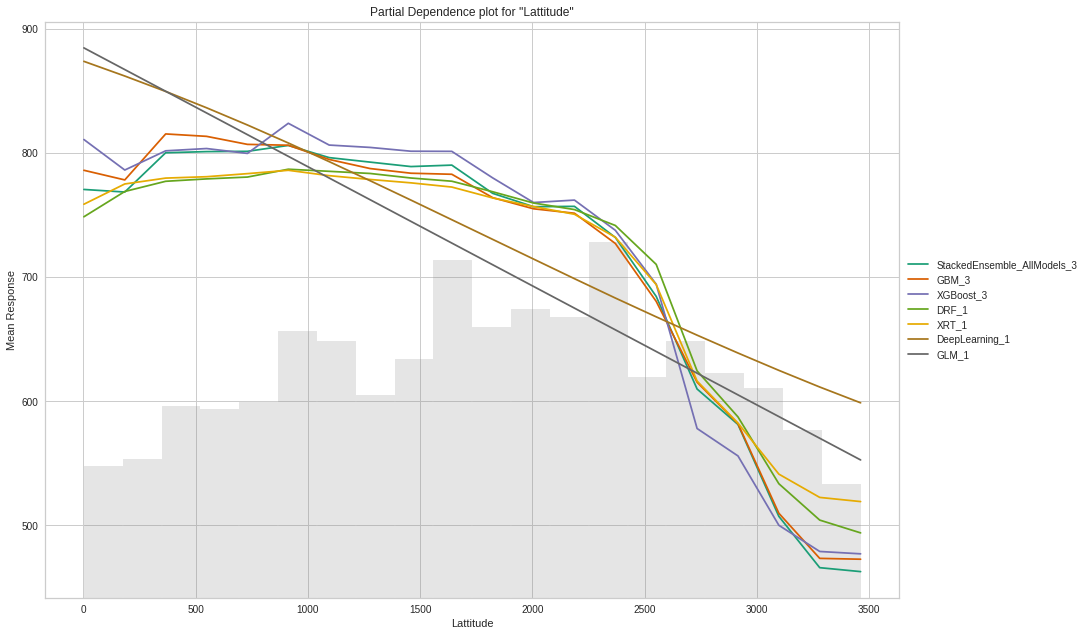

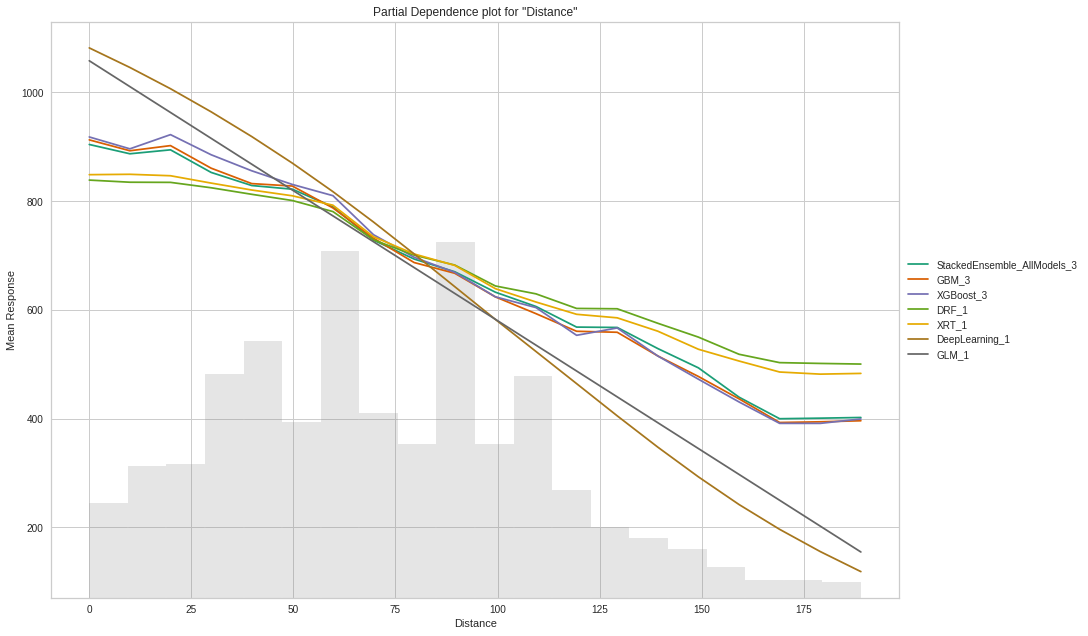

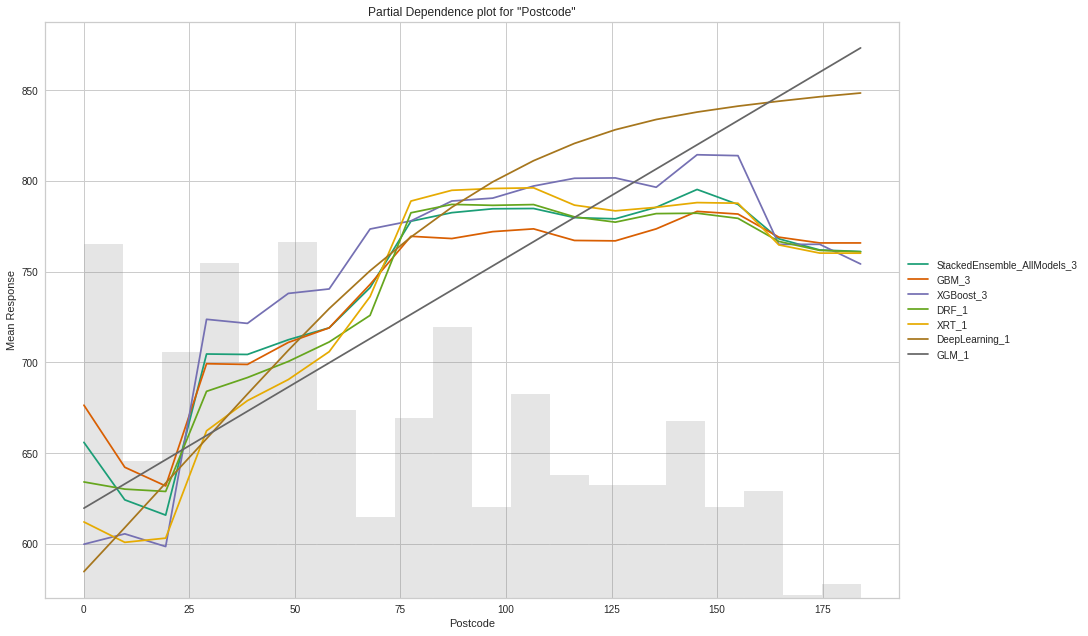

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

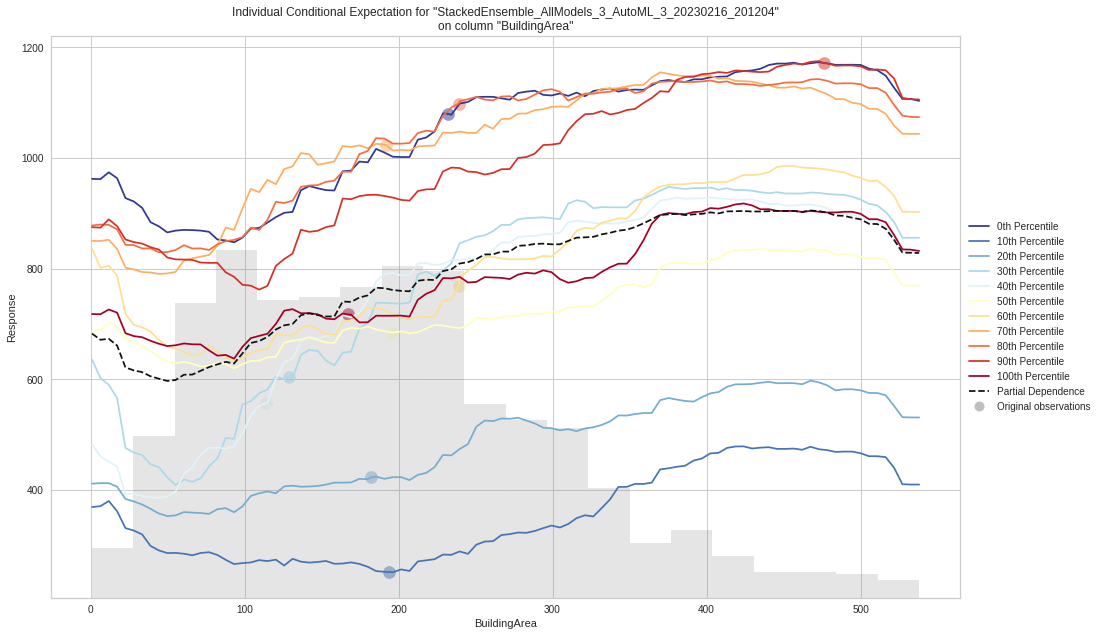

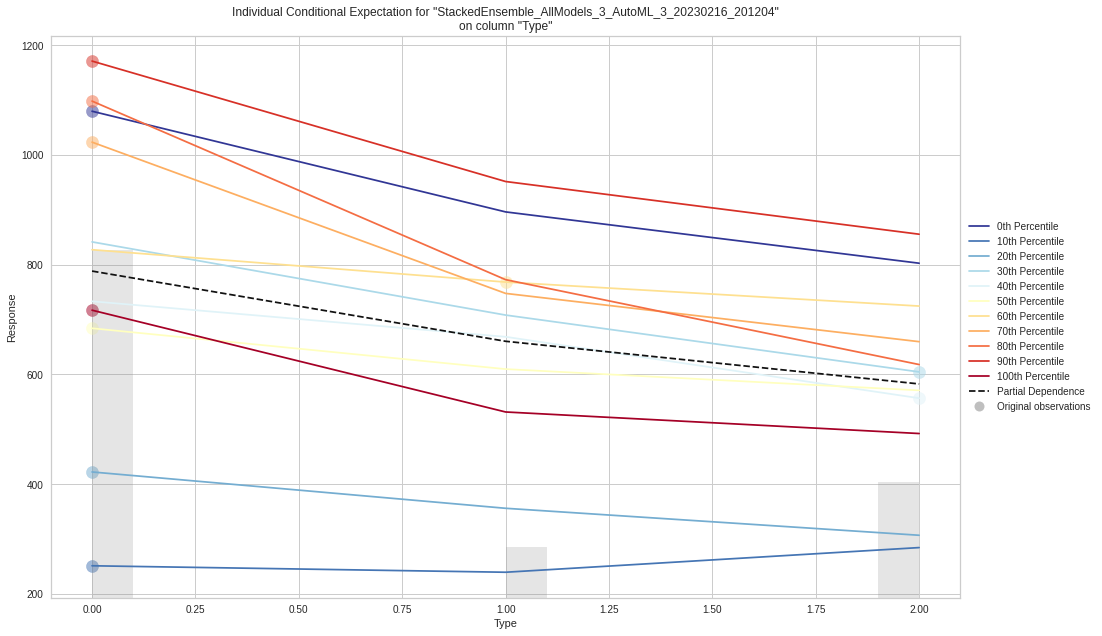

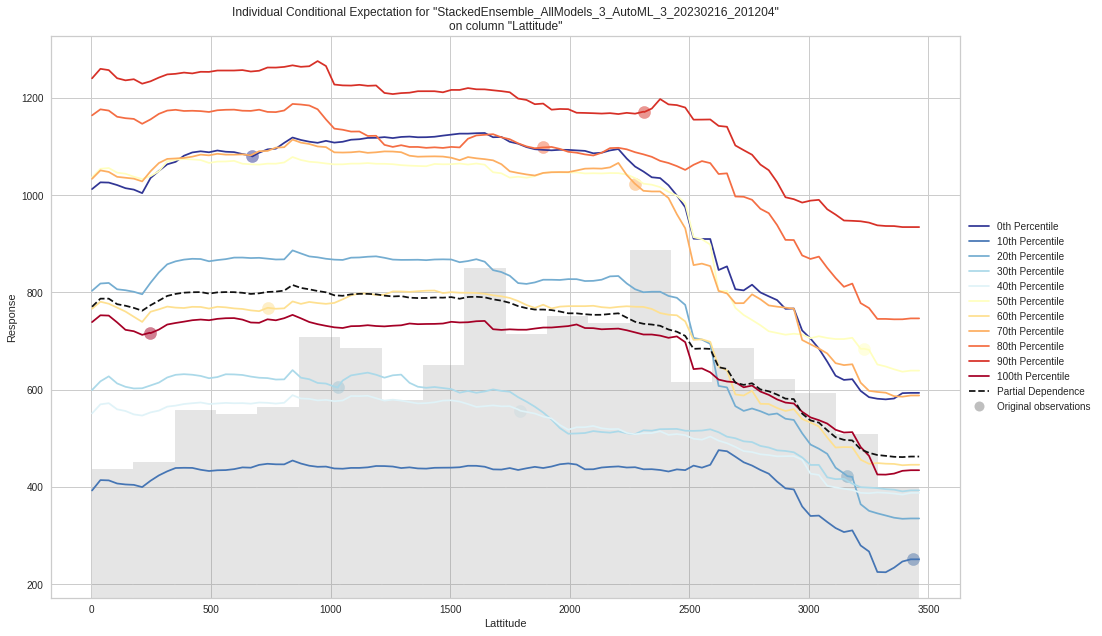

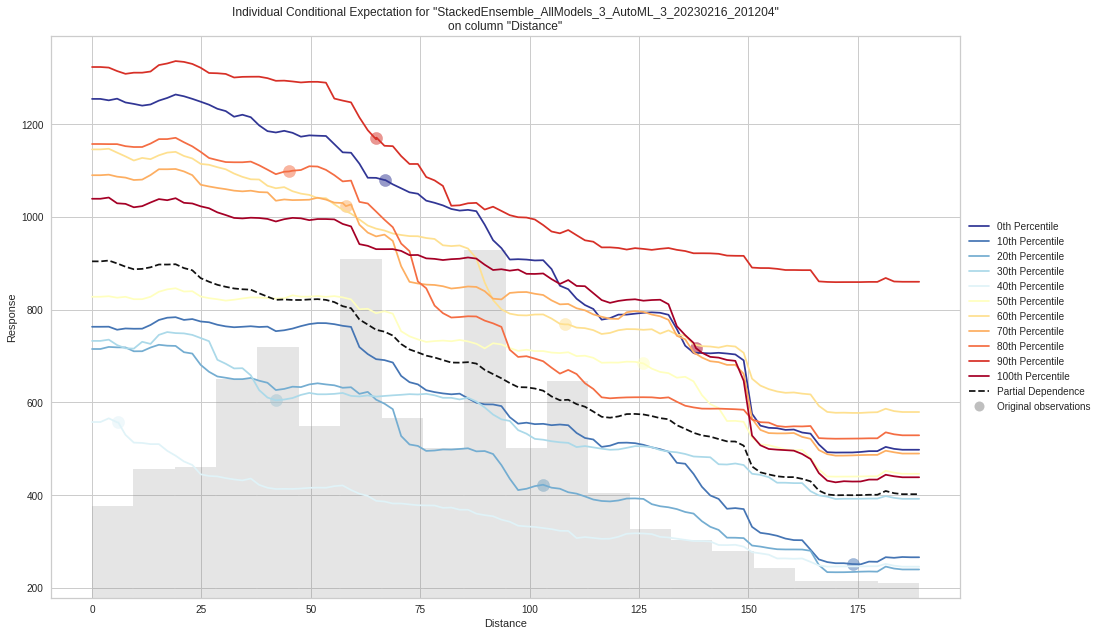

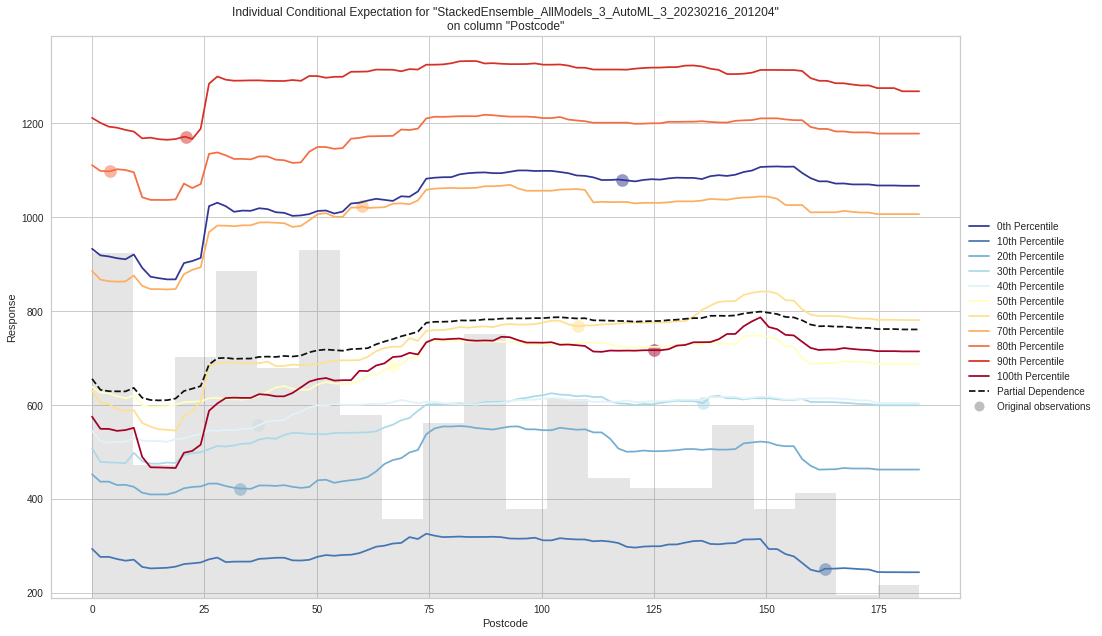

In [63]:
exa = aml1.explain(df1_test)

##**Hyperparameter Tuning** <br>


To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [64]:
s = dfpd1['Price']

t = dfpd1.drop(['Price'], axis = 1)

In [65]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [66]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results.

In [67]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)


In [68]:
random_rf.best_params_

{'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 500}

##**Conclusion**

A fundamental algorithm based on the linear regression method to predict housing prices was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables.  H20.ai framework was used to train and test the variables of the dataset of Melbourne Housing price. This gave the best model as ‘gbm’ and accuracy for test data was 89.9%.  From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the housing price to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

##**Assignment Question/Answers**



Q1) Is the relationship significant?
A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored.
P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘Address’ and ‘Date’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. 
Hence for the chosen dataset it can be concluded that the relationship is significant.



Q2) Are any model assumptions violated?
Assumptions for linear regression are:
1)	Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.
2)	Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
3)	No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables Rooms and BuildingArea. 
4)	No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 1.6, therefore this assumption is not violated.




Q3) Is there any multicollinearity in the model?
When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable.
Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables.
In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists.
In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved. Currently high correlation exists between Rooms and BuildingArea 



Q4) In the multivariate models are predictor variables independent of all the other predictor variables?
Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not.
When correlation matrix is computed for the model, it can be observed that Rooms and BuildingArea are correlated to each other. Other than those other predictors are independent from each other.



Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
From the variable importance plot, the most to least important variables are displayed.
For my model BuildingArea, Type, Latitude and Rooms are top 4 most important variables to determine Price. VIF and p-values for Address, Date, Bedroom2, YearBuilt and Longtitude was high than the ideal values. So those variables were excluded from the model.



Q6) Does the model make sense?
For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.76 which is considered good in terms of accuracy. So overall the model makes sense.
To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.



Q7)Does regularization help?
Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model.
For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.



Q8) Which independent variables are significant?
 Variables are significant when p-value is less than 0.05. For this model except for ‘Date’,’YearBuilt’ and ‘Address’ all other variables have p-value less than 0.05. So, it can be said that all variables are significant.



Q9) Which hyperparameters are important?
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.
For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:-
'max_depth': 500, 'min_samples_split': 2 and 'n_estimators': 100

##**LICENSE**

MIT License

Copyright (c) 2022 Sanika Patne

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

##**REFERENCES**

H20.ai- https://docs.h2o.ai/ <br>
OLS Model- http://net-informations.com/ds/mla/ols.html<br>
Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/ <br>
Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/ <br>
Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression <br>
Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot <br>
Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML